In [22]:
#!pip install dash

In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
from dash import Dash, html, dcc, Input, Output
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
filePath = "Student-data.csv"
headers = [
    'First Term Gpa', 'Second Term Gpa', 'First Language', 'Funding', 'School',
    'Fast Track', 'Coop', 'Residency', 'Gender', 'Prev Education',
    'Age Group', 'High School Average Mark', 'Math Score', 'English Grade', 'FirstYearPersistence'
]

In [25]:
df = pd.read_csv(filePath, skiprows=24, header=None)  # we are skipping the first 24 rows
df.columns = headers  
df.shape

(1437, 15)

In [26]:
df.to_csv('temp.csv')

In [27]:
df.head()

,First Term Gpa,Second Term Gpa,First Language,Funding,School,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0,0,1,2,6,2,1,1,2,1,1,59,16,7,1
1,2.5,2,3,4,6,1,2,2,2,1,3,?,?,7,1
2,4.25,3.923077,1,1,6,2,1,1,1,2,3,92,41,9,1
3,3.020833,2.321429,3,4,6,1,2,2,2,2,3,?,?,8,1
4,4.275,4.326923,1,2,6,1,1,1,1,2,3,97,?,9,1


In [28]:
df['School'].value_counts()

School
6    1437
Name: count, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   First Term Gpa            1437 non-null   object
 1   Second Term Gpa           1437 non-null   object
 2   First Language            1437 non-null   object
 3   Funding                   1437 non-null   int64 
 4   School                    1437 non-null   int64 
 5   Fast Track                1437 non-null   int64 
 6   Coop                      1437 non-null   int64 
 7   Residency                 1437 non-null   int64 
 8   Gender                    1437 non-null   int64 
 9   Prev Education            1437 non-null   object
 10  Age Group                 1437 non-null   object
 11  High School Average Mark  1437 non-null   object
 12  Math Score                1437 non-null   object
 13  English Grade             1437 non-null   object
 14  FirstYearPersistence    

In [30]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

First Term Gpa               17
Second Term Gpa             160
First Language              111
Funding                       0
School                        0
Fast Track                    0
Coop                          0
Residency                     0
Gender                        0
Prev Education                4
Age Group                     4
High School Average Mark    743
Math Score                  462
English Grade                45
FirstYearPersistence          0
dtype: int64

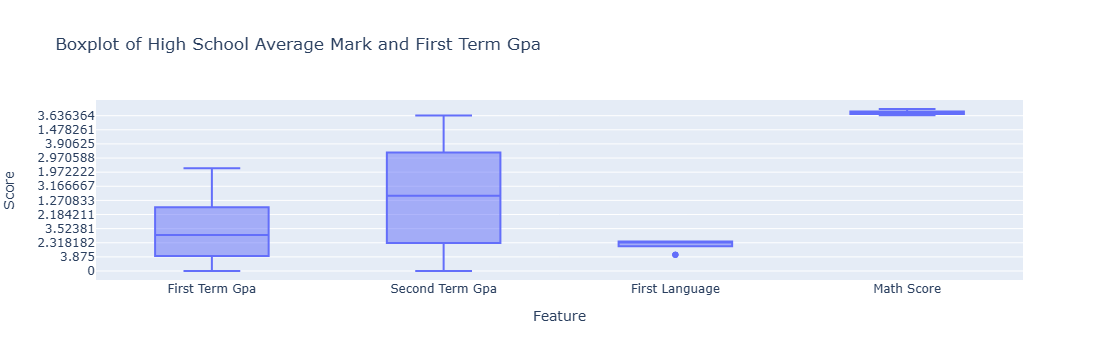

In [31]:
# Lets visualize the outliers in High School Average Mark and Math Score
import plotly.express as px
data_long = df.melt(value_vars=['First Term Gpa', 'Second Term Gpa', 'First Language', 'Math Score'], var_name='Feature', value_name='Score')
fig = px.box(data_long, x='Feature', y='Score', title='Boxplot of High School Average Mark and First Term Gpa')
fig.show()

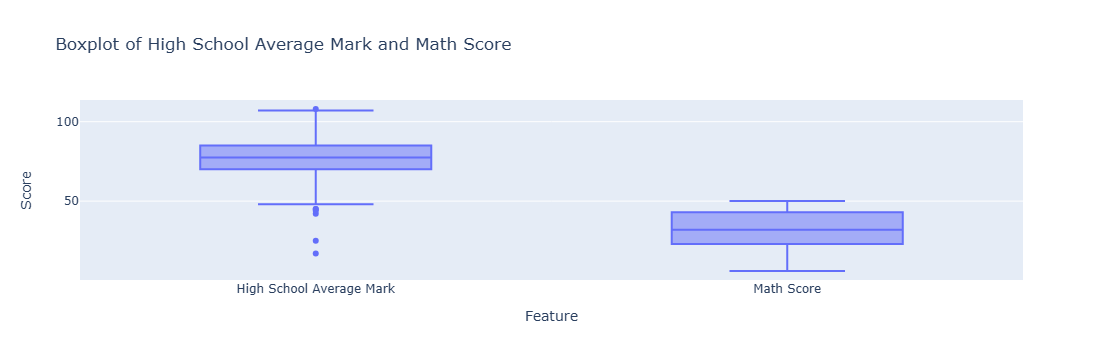

In [32]:
# Lets visualize the outliers in High School Average Mark and Math Score
import plotly.express as px
df['Math Score'] = pd.to_numeric(df['Math Score'], errors='coerce')
data_long = df.melt(value_vars=['High School Average Mark', 'Math Score'], var_name='Feature', value_name='Score')
fig = px.box(data_long, x='Feature', y='Score', title='Boxplot of High School Average Mark and Math Score')
fig.show()

In [33]:
# Now let us convert specified columns to numeric, coercing errors to NaN.
def convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [34]:
# Now let us impute specified columns with their mean.
def impute_with_mean(df, columns):
    for col in columns:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

In [35]:
# Now let us impute specified columns with their mode.
def impute_with_mode(df, columns):
    for col in columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    return df

In [36]:
# Lets Drop specified columns from the dataframe using this function
def drop_columns(df, columns):
    df.drop(columns=columns, inplace=True)
    return df


In [37]:
# Now this function is the full preprocessing pipeline for the dataframe.
def preprocess_data(df):
    # Lets convert specific columns to numeric
    numeric_columns = ['First Term Gpa', 'Second Term Gpa', 'First Language', 'Math Score']
    df = convert_to_numeric(df, numeric_columns)

    # Let us impute the GPA columns and Math Score with mean
    gpa_columns = ['First Term Gpa', 'Second Term Gpa', 'Math Score']
    df = impute_with_mean(df, gpa_columns)

    # Let us impute categorical features with mode
    categorical_columns = ['First Language', 'Prev Education', 'English Grade']
    df = impute_with_mode(df, categorical_columns)

    df = df.dropna(subset=['Age Group'])

    columns_to_drop = ['High School Average Mark', 'School'] # school only has engineering, and high school average has more than 51 % of the data is missing
    df = drop_columns(df, columns_to_drop)

    return df

In [38]:
df = preprocess_data(df)


C:\Users\MIS\AppData\Local\Temp\ipykernel_16772\2613916081.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df.isnull().sum()

First Term Gpa          0
Second Term Gpa         0
First Language          0
Funding                 0
Fast Track              0
Coop                    0
Residency               0
Gender                  0
Prev Education          0
Age Group               0
Math Score              0
English Grade           0
FirstYearPersistence    0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1433 entries, 0 to 1436
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   First Term Gpa        1433 non-null   float64
 1   Second Term Gpa       1433 non-null   float64
 2   First Language        1433 non-null   float64
 3   Funding               1433 non-null   int64  
 4   Fast Track            1433 non-null   int64  
 5   Coop                  1433 non-null   int64  
 6   Residency             1433 non-null   int64  
 7   Gender                1433 non-null   int64  
 8   Prev Education        1433 non-null   object 
 9   Age Group             1433 non-null   object 
 10  Math Score            1433 non-null   float64
 11  English Grade         1433 non-null   object 
 12  FirstYearPersistence  1433 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 156.7+ KB


In [41]:
import pandas as pd

# Now lets define a mapping so we can understand our labeled data better, for this we create a mapping dictionary and then convert
# the columns, we create a new dataframe called df2
mappings = {
    "First Language": {1: "English", 2: "French", 3: "Other"},
    "Funding": {
        1: "Apprentice_PS", 2: "GPOG_FT", 3: "Intl Offshore", 4: "Intl Regular",
        5: "Intl Transfer", 6: "Joint Program Ryerson", 7: "Joint Program UTSC",
        8: "Second Career Program", 9: "Work Safety Insurance Board"
    },
    "Fast Track": {1: "Y", 2: "N"},
    "Coop": {1: "Y", 2: "N"},
    "Residency": {1: "Domestic", 2: "International"},
    "Gender": {1: "Female", 2: "Male", 3: "Neutral"},
    "Prev Education": {1: "HighSchool", 2: "PostSecondary"},
    "Age Group": {
        1: "0 to 18", 2: "19 to 20", 3: "21 to 25", 4: "26 to 30",
        5: "31 to 35", 6: "36 to 40", 7: "41 to 50", 8: "51 to 60",
        9: "61 to 65", 10: "66+"
    },
    "English Grade": {
        1: "Level-130", 2: "Level-131", 3: "Level-140", 4: "Level-141",
        5: "Level-150", 6: "Level-151", 7: "Level-160", 8: "Level-161",
        9: "Level-170", 10: "Level-171", 11: "Level-180"
    }
}
columns_to_convert = ["Prev Education", "Age Group", "English Grade"]
for column in columns_to_convert:
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Apply mappings
df2 = df.copy()
for column, mapping in mappings.items():
    if column in df2.columns:
        df2[column] = df2[column].map(mapping)

In [42]:
df2.to_csv("df2_data.csv", index=False) 

In [67]:
df.head()

,First Term Gpa,Second Term Gpa,First Language,Funding,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,1.0,2,2,1,Domestic,2,1,1,16.000000,7,1
1,2.500000,2.000000,3.0,4,1,2,International,2,1,3,32.557949,7,1
2,4.250000,3.923077,1.0,1,2,1,Domestic,1,2,3,41.000000,9,1
3,3.020833,2.321429,3.0,4,1,2,International,2,2,3,32.557949,8,1
4,4.275000,4.326923,1.0,2,1,1,Domestic,1,2,3,32.557949,9,1


In [43]:
df2.head()
# The labelles have been corrected with their categories

,First Term Gpa,Second Term Gpa,First Language,Funding,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,English,GPOG_FT,N,Y,Domestic,Male,HighSchool,0 to 18,16.000000,Level-160,1
1,2.500000,2.000000,Other,Intl Regular,Y,N,International,Male,HighSchool,21 to 25,32.557949,Level-160,1
2,4.250000,3.923077,English,Apprentice_PS,N,Y,Domestic,Female,PostSecondary,21 to 25,41.000000,Level-170,1
3,3.020833,2.321429,Other,Intl Regular,Y,N,International,Male,PostSecondary,21 to 25,32.557949,Level-161,1
4,4.275000,4.326923,English,GPOG_FT,Y,Y,Domestic,Female,PostSecondary,21 to 25,32.557949,Level-170,1


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1433 entries, 0 to 1436
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   First Term Gpa        1433 non-null   float64
 1   Second Term Gpa       1433 non-null   float64
 2   First Language        1433 non-null   object 
 3   Funding               1433 non-null   object 
 4   Fast Track            1433 non-null   object 
 5   Coop                  1433 non-null   object 
 6   Residency             1433 non-null   object 
 7   Gender                1433 non-null   object 
 8   Prev Education        1345 non-null   object 
 9   Age Group             1433 non-null   object 
 10  Math Score            1433 non-null   float64
 11  English Grade         1433 non-null   object 
 12  FirstYearPersistence  1433 non-null   int64  
dtypes: float64(3), int64(1), object(9)
memory usage: 156.7+ KB


## Visualizations
### Lets First see the correlation of our features

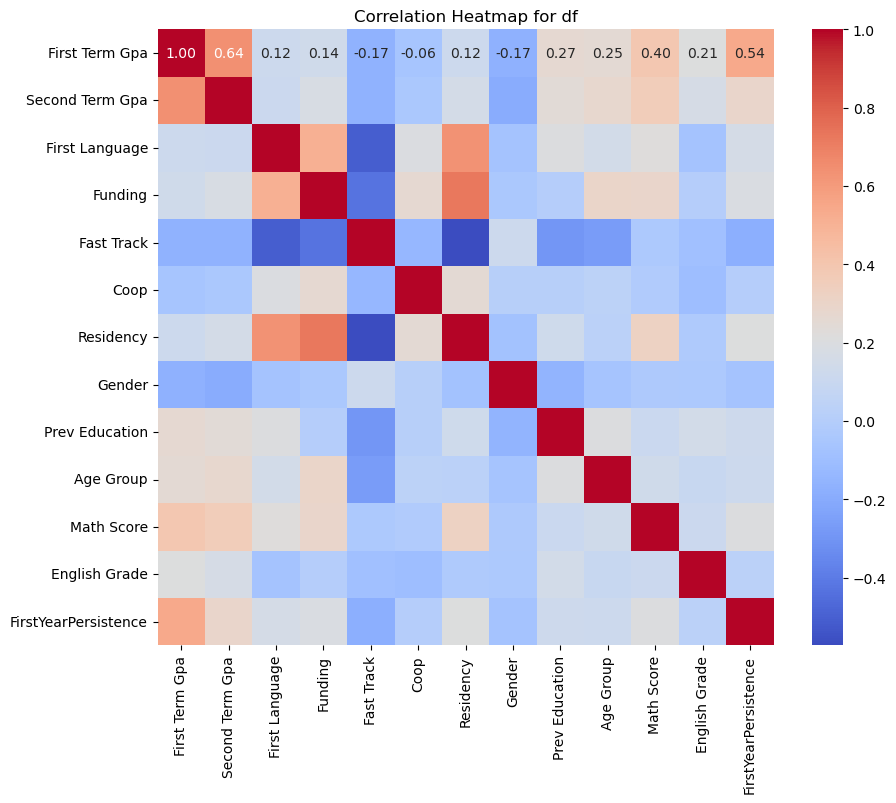

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for df1
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True
)
plt.title("Correlation Heatmap for df")
plt.show()


#### GPA Trends Filtered with coop

In [46]:
selected_coop = 'Y'  # Change this to 2 for non-co-op
filtered_df = df2[df2['Coop'] == selected_coop]

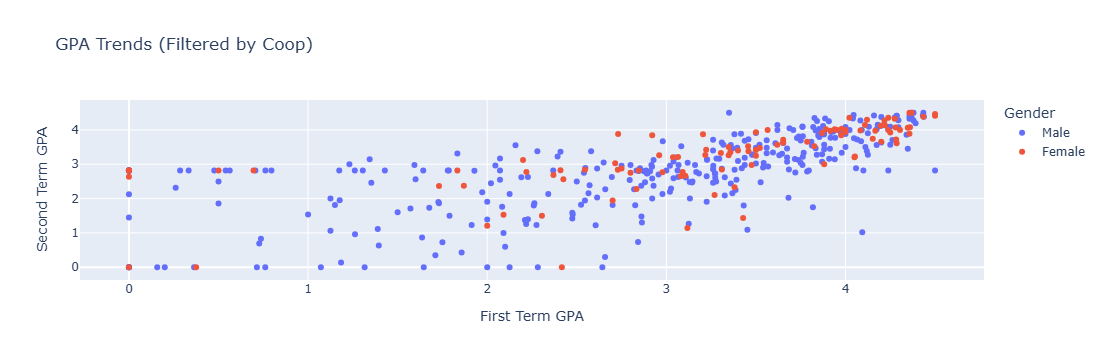

In [47]:
import plotly.express as px

fig = px.scatter(
    filtered_df, 
    x="First Term Gpa", 
    y="Second Term Gpa", 
    color="Gender", 
    title="GPA Trends (Filtered by Coop)",
    labels={"First Term Gpa": "First Term GPA", "Second Term Gpa": "Second Term GPA"},
    hover_data=['Funding', 'Prev Education']
)

fig.update_layout(
    xaxis_title="First Term GPA",
    yaxis_title="Second Term GPA",
    legend_title="Gender"
)

fig.show()

The feature Gender has a major class imbalance, there 1111 records for Male, and only 325 records for Females. We can observe this in the scatterplot. We can also observe that Female students tend to perform better, with higher GPA Scores.

In [48]:
print(df2.dtypes)

First Term Gpa          float64
Second Term Gpa         float64
First Language           object
Funding                  object
Fast Track               object
Coop                     object
Residency                object
Gender                   object
Prev Education           object
Age Group                object
Math Score              float64
English Grade            object
FirstYearPersistence      int64
dtype: object


In [49]:
df2[(df2['First Term Gpa'] == 0) & (df2['Second Term Gpa'] == 0)]

,First Term Gpa,Second Term Gpa,First Language,Funding,Fast Track,Coop,Residency,Gender,Prev Education,Age Group,Math Score,English Grade,FirstYearPersistence
0,0.0,0.0,English,GPOG_FT,N,Y,Domestic,Male,HighSchool,0 to 18,16.000000,Level-160,1
167,0.0,0.0,Other,GPOG_FT,N,Y,Domestic,Female,HighSchool,0 to 18,26.000000,Level-160,0
168,0.0,0.0,English,GPOG_FT,N,N,Domestic,Male,HighSchool,0 to 18,37.000000,Level-160,0
201,0.0,0.0,English,GPOG_FT,N,N,Domestic,Male,HighSchool,0 to 18,29.000000,Level-160,1
354,0.0,0.0,English,GPOG_FT,N,N,Domestic,Male,HighSchool,0 to 18,16.000000,Level-170,0
390,0.0,0.0,English,GPOG_FT,N,N,Domestic,Male,HighSchool,0 to 18,28.000000,Level-130,0
500,0.0,0.0,English,GPOG_FT,N,N,Domestic,Male,HighSchool,21 to 25,19.000000,Level-170,1
610,0.0,0.0,English,GPOG_FT,N,N,Domestic,Female,NaN,19 to 20,27.000000,Level-170,0
643,0.0,0.0,English,GPOG_FT,N,Y,Domestic,Male,HighSchool,19 to 20,27.000000,Level-170,0
1058,0.0,0.0,Other,Intl Regular,N,Y,International,Male,HighSchool,21 to 25,32.557949,Level-161,0


In [50]:
df2[(df2['First Term Gpa'] == 0) & (df2['Second Term Gpa'] == 0)].shape

(18, 13)

#### Previous Education with COOP

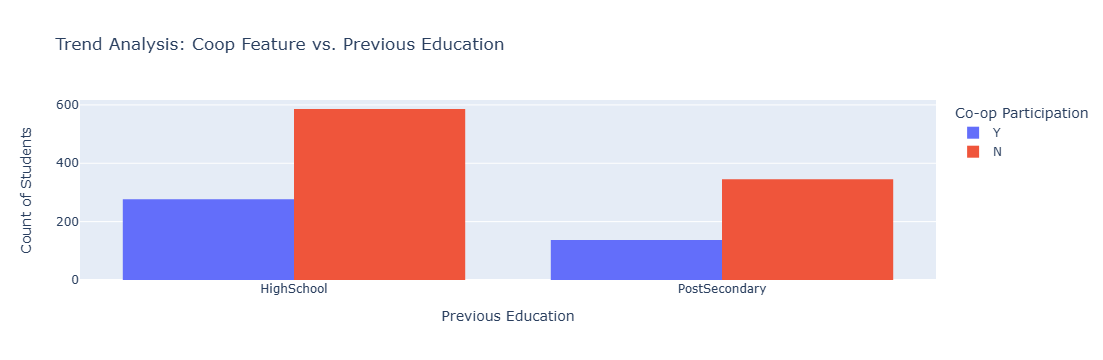

In [51]:
import plotly.express as px

fig = px.histogram(
    df2,
    x="Prev Education",
    color="Coop",
    barmode="group",
    title="Trend Analysis: Coop Feature vs. Previous Education",
    labels={"Prev Education": "Previous Education", "Coop": "Co-op Participation"}
)

fig.update_layout(
    xaxis_title="Previous Education",
    yaxis_title="Count of Students",
    legend_title="Co-op Participation",
    bargap=0.2
)
fig.show()
# use proportions instead of count
# or stacked bar chart

Prev Education has 863 records corresponding to High School and 482 records corresponding to Post Secondary Education. From this visualization we can observe that there are more students who dont participate in co-op overall and Students whose prev education was Post Secondary have a lower participation in Co-op, this can be due to alternate career paths, internships, etc

In [72]:
df2[df2['Prev Education'] == 'HighSchool'].shape

(863, 13)

#### Influence of English Grade on COOP

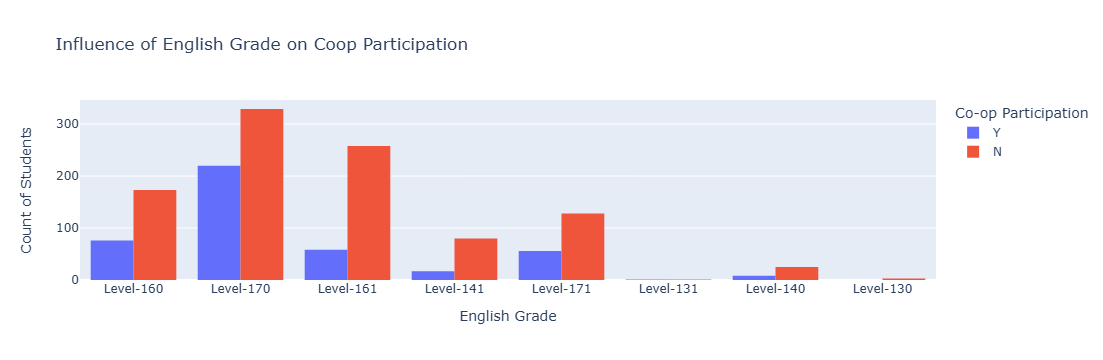

In [52]:
fig = px.histogram(
    df2,
    x="English Grade",
    color="Coop",
    barmode="group",
    title="Influence of English Grade on Coop Participation",
    labels={"English Grade": "English Grade", "Coop": "Co-op Participation"}
)

fig.update_layout(
    xaxis_title="English Grade",
    yaxis_title="Count of Students",
    legend_title="Co-op Participation",
    bargap=0.2
)

fig.show()

As we can see there are more students participating in coop for students with English Grade Level 160 and Level 161, while Level 170 has the highest Non - coop count. This suggests that coop participation is more common for those with Higher English Grades
#### Influence of Funding with coop

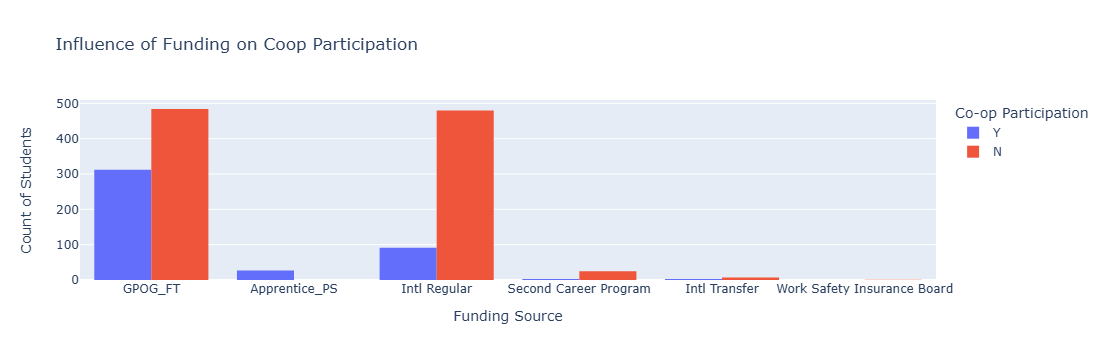

In [53]:
fig = px.histogram(
    df2,
    x="Funding",
    color="Coop",
    barmode="group",
    title="Influence of Funding on Coop Participation",
    labels={"Funding": "Funding Source", "Coop": "Co-op Participation"}
)

fig.update_layout(
    xaxis_title="Funding Source",
    yaxis_title="Count of Students",
    legend_title="Co-op Participation",
    bargap=0.2
)

fig.show()

We can notice that GPOG_FT and Intl Regular funding categories have the highest student counts, with non-Co-op participants outnumbering Co-op participants.
While other funding categories, such as Apprentice_PS and Second Career Program, show minimal participation in both Co-op and non-Co-op programs.
#### Influence of First Year Persistence with coop

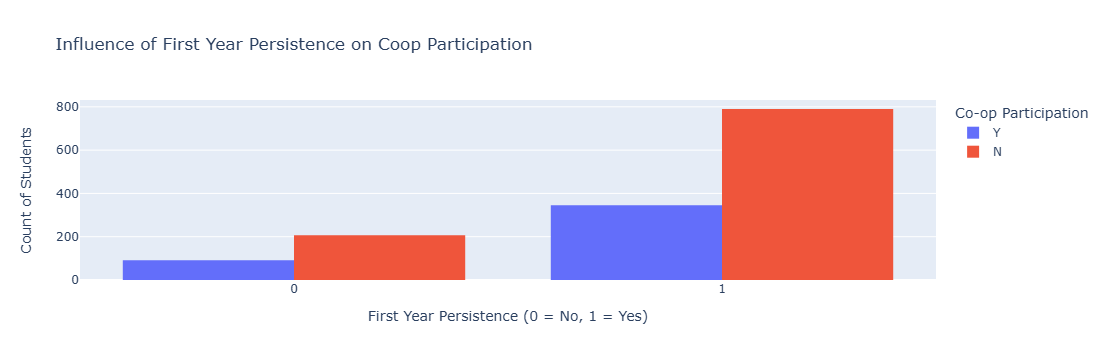

In [54]:
import plotly.express as px

# Visualization of FirstYearPersistence vs. Coop Participation
fig = px.histogram(
    df2,
    x="FirstYearPersistence",
    color="Coop",
    barmode="group",
    title="Influence of First Year Persistence on Coop Participation",
    labels={"FirstYearPersistence": "First Year Persistence", "Coop": "Co-op Participation"}
)

fig.update_layout(
    xaxis_title="First Year Persistence (0 = No, 1 = Yes)",
    yaxis_title="Count of Students",
    legend_title="Co-op Participation",
    bargap=0.2
)

fig.show()

Students with First Year Persistance (1) have a higher proportion compared to those without First Year Persistence (0), Also the count of those not participating in coop are lot higher in both the groups.

### Visualization with Residency
#### First Language Distribution by Residency

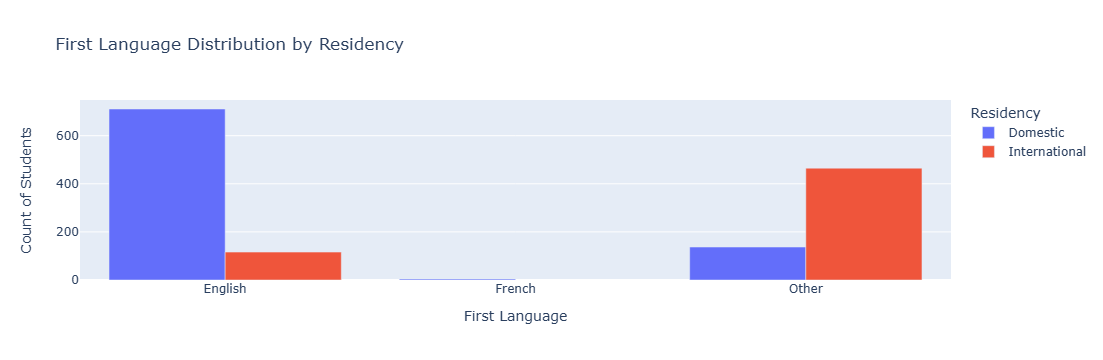

In [55]:
# Aggregate the counts for each First Language by Residency
language_counts = df2.groupby(["Residency", "First Language"]).size().reset_index(name="Count")
# lets create a clustered bar chart here
fig = px.bar(
    language_counts,
    x="First Language",
    y="Count",
    color="Residency",
    barmode="group",
    title="First Language Distribution by Residency",
    labels={"First Language": "First Language", "Count": "Count of Students"}
)

fig.update_layout(
    xaxis_title="First Language",
    yaxis_title="Count of Students",
    bargap=0.2  # Adjust bar gap for better readability
)
fig.show()

Where Residency is Domestic, 711 students First Language is English and 137 students First Language is some other language, while 4 students speak French. 
Whereas when the Residency is International there are no students that speak French, and 465 of the students First Language is other languages and only 116 students first language is English. 
#### Age Group Distribution by Residency

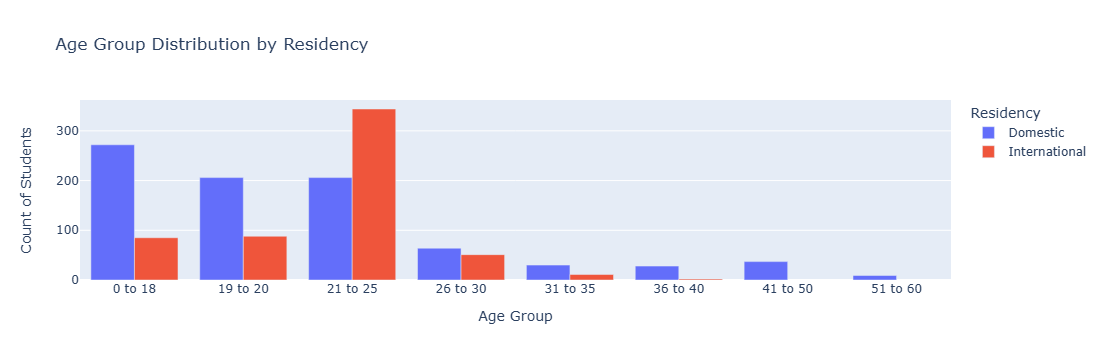

In [56]:
# Aggregate data by Residency and Age Group
age_group_counts = df2.groupby(["Residency", "Age Group"]).size().reset_index(name="Count")
fig = px.bar(
    age_group_counts,
    x="Age Group",
    y="Count",
    color="Residency",
    barmode="group",
    title="Age Group Distribution by Residency",
    labels={"Age Group": "Age Group", "Count": "Count of Students", "Residency": "Residency"}
)
fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Count of Students",
    bargap=0.2 
)
fig.show()

We can observe that Domestic Students fall in the age group from 0-25 with few students in higher age groups. Whereas International Students mostly fall in the age group of 20-25 with few studetns in between 0-20. This tells us that most students who come to study from other countries are from the age group 21-25.
Also there are no International students who pursue their education after the age of 40, whereas there are 37 Domenstic students who fall in the age group 41-50 and only 9 students who are older than 51
#### Gender Distribution by Residency

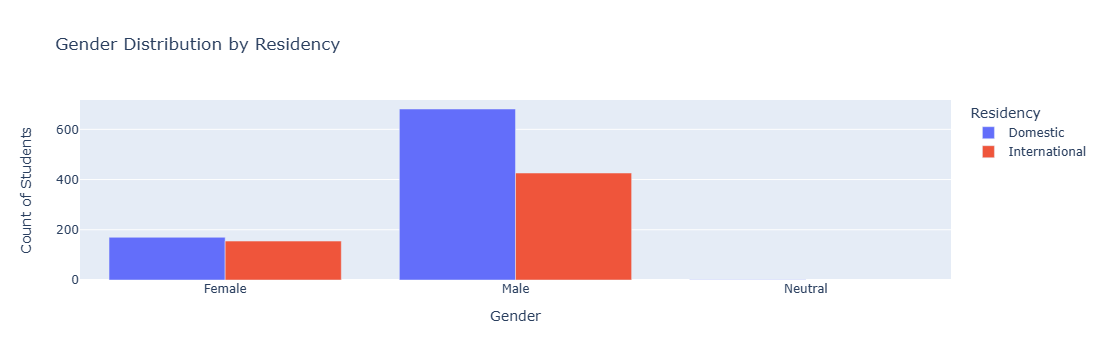

In [57]:
# Aggregate data by Residency and Gender
gender_counts = df2.groupby(["Residency", "Gender"]).size().reset_index(name="Count")
fig = px.bar(
    gender_counts,
    x="Gender",
    y="Count",
    color="Residency",
    barmode="group",
    title="Gender Distribution by Residency",
    labels={"Gender": "Gender", "Count": "Count of Students", "Residency": "Residency"}
)

fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Count of Students",
    bargap=0.2  
)
fig.show()

For both International and Domestic Residency the count of Males is higher, while there are a very minor amount of students who identify as Neither Male nor Female and they all are Domestic Students
#### English Grade Distribution by Residency

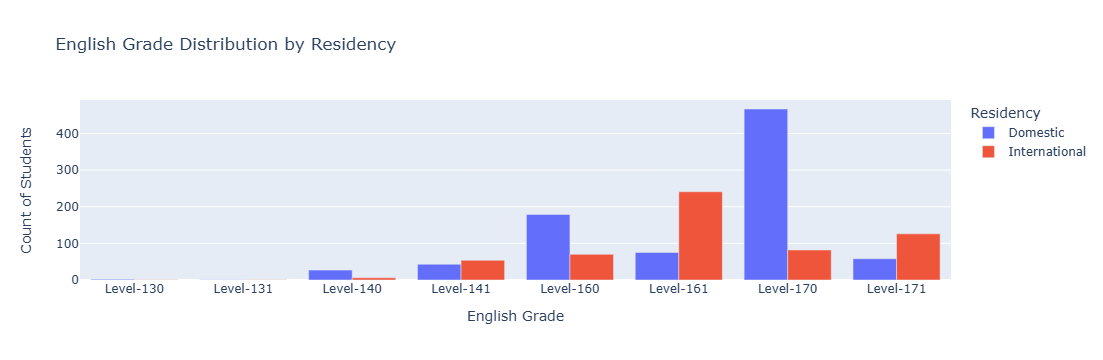

In [58]:
# Aggregate data by Residency and English Grade
english_grade_counts = df2.groupby(["Residency", "English Grade"]).size().reset_index(name="Count")

fig = px.bar(
    english_grade_counts,
    x="English Grade",
    y="Count",
    color="Residency",
    barmode="group",
    title="English Grade Distribution by Residency",
    labels={"English Grade": "English Grade", "Count": "Count of Students", "Residency": "Residency"}
)

fig.update_layout(
    xaxis_title="English Grade",
    yaxis_title="Count of Students",
    bargap=0.2  
)

fig.show()

Majority of Domestic Students have a English Grade of Level 170, with few students in Englsih Grade Level 160, 161 and 171.
Whereas majority of International Students have a English Grade of Level 161, 171, and 170, with few students with English Grade of Level 160,141, and very few with lower English Grade.

This tells us that while majority of Domestic Students have a higher English Grade compared to International Students
#### GPA Comparision: First Term GPA vs Second Term GPA

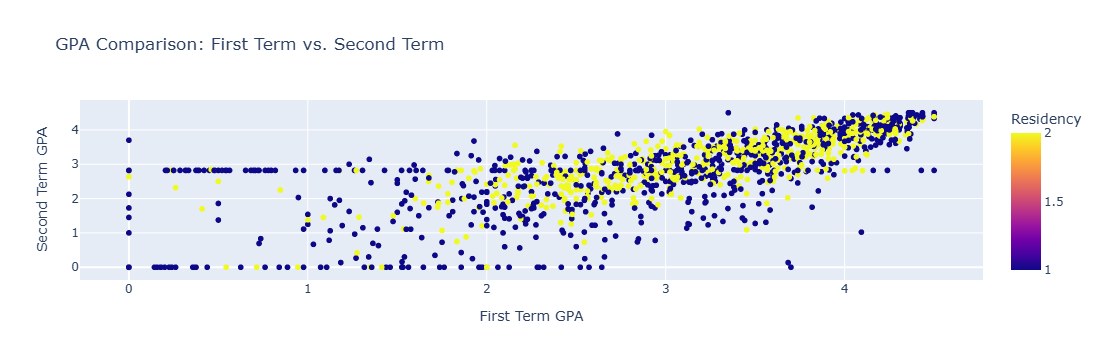

In [59]:
# Lets create a scatter plot for GPA Comparision
fig = px.scatter(
    df,
    x="First Term Gpa",
    y="Second Term Gpa",
    color="Residency",
    title="GPA Comparison: First Term vs. Second Term",
    labels={"First Term Gpa": "First Term GPA", "Second Term Gpa": "Second Term GPA"},
    hover_data=["Residency"]
)

fig.update_layout(
    xaxis_title="First Term GPA",
    yaxis_title="Second Term GPA",
    legend_title="Residency"
)

fig.show()

#### Math Score Distribution with Residency

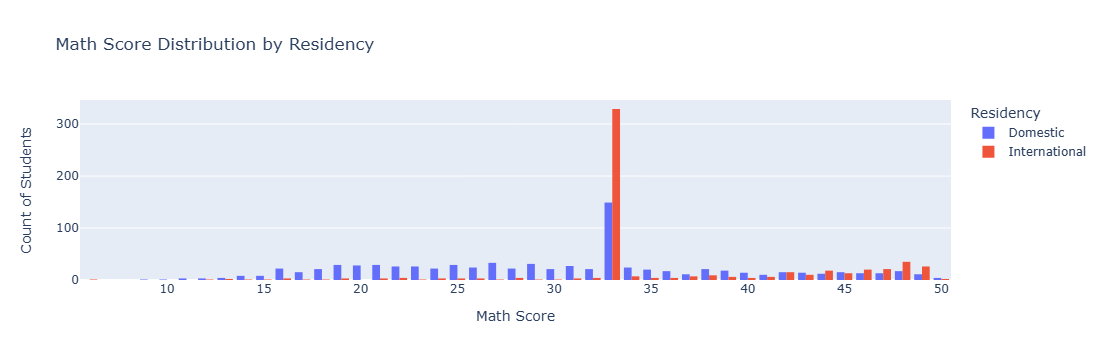

In [60]:
# Map numeric Residency values to labels
residency_map = {1: "Domestic", 2: "International"}
df["Residency"] = df["Residency"].map(residency_map)

fig = px.histogram(
    df,
    x="Math Score",
    color="Residency",
    barmode="group",
    title="Math Score Distribution by Residency",
    labels={"Math Score": "Math Score", "count": "Count of Students"}
)

fig.update_layout(
    xaxis_title="Math Score",
    yaxis_title="Count of Students",
    legend_title="Residency"
)

fig.show()

#### Count of Age Groups by Gender

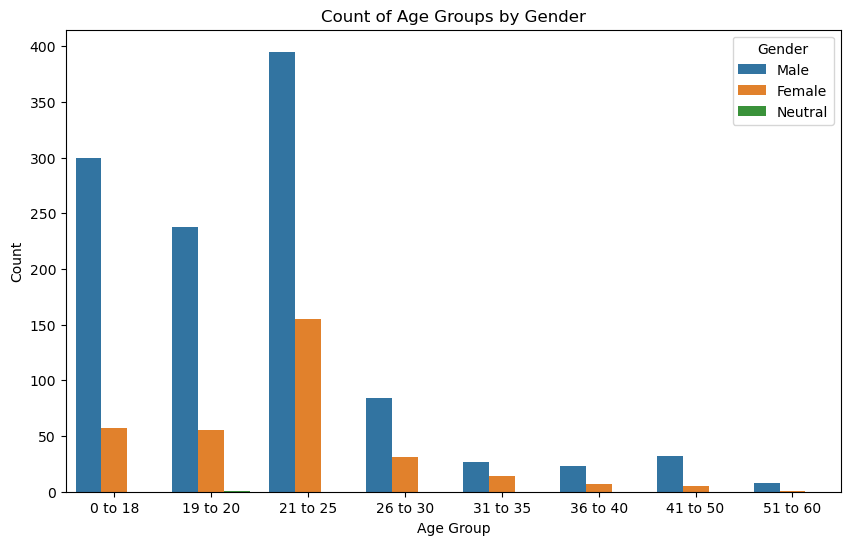

In [61]:
# Lets create a countplot to get an key insight from the gender column and age group:-
age_order = ['0 to 18', '19 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40','41 to 50','51 to 60']

plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Gender', data=df2, order=age_order)
plt.title('Count of Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

From this above visualization, we can clearly see that there is predominance of males compare to females and neutral within all the Age Group, the younger age group shows more of a balanced gender distribution and we can see that as the Age Group progress from middle age to older age there is distinct decline in population count indicating different factors.

#### GPA Trend by Age Group

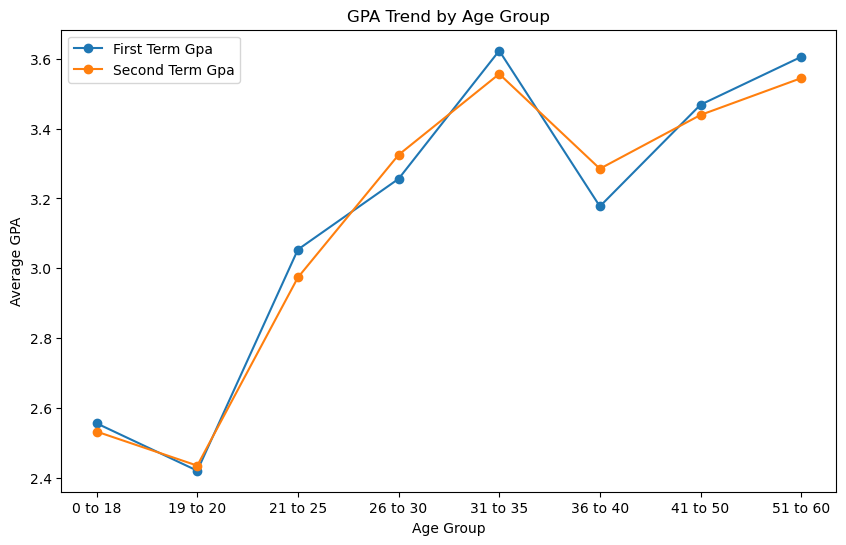

In [62]:
# Lets create a line chart to show the trend of First Term Gpa and Second Term Gpa accross different Age Groups:-
Gpa_age = df2.groupby('Age Group')[['First Term Gpa', 'Second Term Gpa']].mean()
Gpa_age.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('GPA Trend by Age Group')
plt.ylabel('Average GPA')
plt.xlabel('Age Group')
plt.show()


This Visualization provides valuable insights how student performance varies at different stages of life (Age Group). It highlights the difference between First Term Gpa and Second Term Gpa where the Second Term Gpa is relatively higher than the First Gpa.

#### Average GPA Conversion by Gender

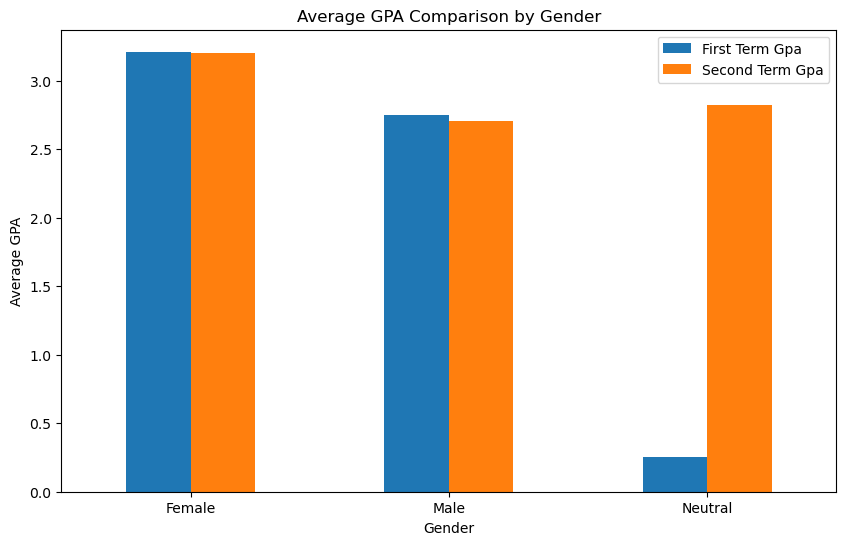

In [63]:
# Visualizing for First Term Gpa and Second Term Gpa on the basis of the Gender:-
# First, let us calculate the average mean:-
gpa_average = df2.groupby(['Gender'])[['First Term Gpa', 'Second Term Gpa']].mean()

# Bar PLot
gpa_average.plot(kind='bar', figsize=(10, 6))
colors = ['skyblue', 'orange']
plt.title('Average GPA Comparison by Gender')
plt.xlabel('Gender')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.show()


As far as Male and Female gender's are concerned we cannot see much of a change in terms of GPA grade, for male and female a alight decrease in Gpa can be seen in Second Term Gpa from First Term Gpa. but, for the Neutral category we can see that there is hugh improvement in Second Term Gpa compare to First Term Gpa. 

#### Proportion of COOP vs Non-COOP Students

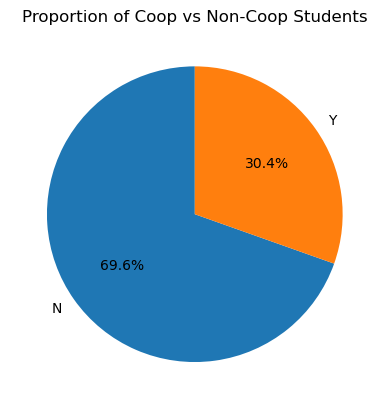

In [64]:
# Showing Insight for the data comparison between Co-op VS Non-Coop Students:-
#Counting the values for the Coop and Non Coop students:-
Count_coop = df2['Coop'].value_counts()
plt.pie(Count_coop, labels=Count_coop.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Coop vs Non-Coop Students')
plt.show()


From the above Pie-Chart, we get an insight that 30.4 are coop students which is 3/10 of the data and 69.6% are the Non Coop Students.

#### Average Math Scores by Age Group

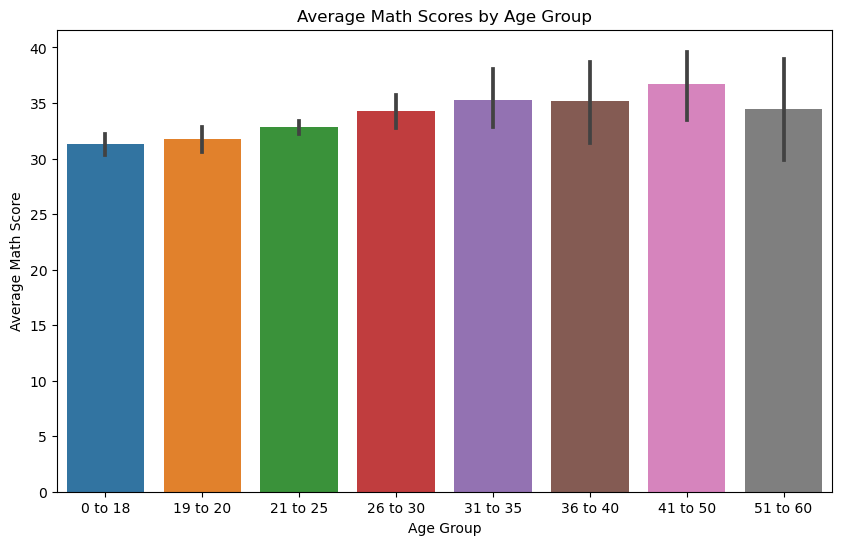

In [65]:
# Defining the group order so that Age Group is arranged properly:-
age_order = ['0 to 18', '19 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40','41 to 50','51 to 60']

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Math Score', data=df2, order=age_order)
plt.title('Average Math Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Math Score')
plt.show()


Key-Insight:-

The maximum number for the math score is 50, and after visualizing the Average Math Score with Age Group to get an insight that which age group has the highest number of Average Math Score and from the graph we can see that as the Age increases, chances of  getting high math score also increases except for the Age Group "51 to 60" which shows a drop in the math score which can be due to age factor.  

### PLOTLY DASHBOARD

In [66]:
df2 = pd.read_csv('df2_data.csv')

app = Dash(__name__)
app.config.suppress_callback_exceptions = True 

app.layout = html.Div([
    dcc.Location(id="url", refresh=False),
    
    html.H1("Student Grade Analysis", style={'textAlign': 'center'}),

    html.Div([
        html.A("Custom Prediction", href="http://127.0.0.1:8000/form", style={
            'marginBottom': '20px',
            'fontSize': '16px',
            'padding': '10px',
            'backgroundColor': '#007BFF',
            'color': 'white',
            'border': 'none',
            'cursor': 'pointer',
            'textDecoration': 'none'
        })
    ], style={'textAlign': 'end', 'margin-right': '50px'}),

    html.Label("Residency Filter:", style={'fontSize': '16px', 'marginLeft': '10px'}),
    dcc.Dropdown(
        id="residency-slicer",
        options=[{"label": res, "value": res} for res in df2["Residency"].unique()],
        value=df2["Residency"].unique()[0],  # Default value
        clearable=False,
        style={'margin': '10px', 'width': '50%'}
    ),

    html.Div([
        dcc.Graph(id="visual-1", style={"display": "inline-block", "width": "48%"}),
        dcc.Graph(id="visual-2", style={"display": "inline-block", "width": "48%"}),
        dcc.Graph(id="visual-3", style={"display": "inline-block", "width": "48%"}),
        dcc.Graph(id="visual-4", style={"display": "inline-block", "width": "48%"})
    ])
])

@app.callback(
    [
        Output("visual-1", "figure"),
        Output("visual-2", "figure"),
        Output("visual-3", "figure"),
        Output("visual-4", "figure")
    ],
    Input("residency-slicer", "value")
)
def update_dashboard(selected_residency):
    filtered_df = df2[df2["Residency"] == selected_residency]

    fig1 = px.pie(
        filtered_df,
        names="First Language",
        title="First Language Distribution",
        color_discrete_sequence=px.colors.qualitative.Pastel
    )

    age_group_mapping = {
        "0 to 18": 1,
        "19 to 20": 2,
        "21 to 25": 3,
        "26 to 30": 4,
        "31 to 35": 5,
        "36 to 40": 6,
        "41 to 50": 7,
        "51 to 60": 8,
        "61 to 65": 9,
        "66+": 10
    }

    filtered_df["Age Group Number"] = filtered_df["Age Group"].map(age_group_mapping)
    filtered_df["Age Group Number"] = pd.to_numeric(filtered_df["Age Group Number"], errors="coerce")
    filtered_df = filtered_df.dropna(subset=["Age Group Number"])  # Remove rows with NaN in Age Group Number
    filtered_df["Age Group Number"] = filtered_df["Age Group Number"].astype(int)  # Ensure it's integer
    fig2 = px.scatter(
        filtered_df,
        x="Math Score",
        y="English Grade",
        size="Age Group Number", 
        color="Gender",
        animation_frame="Age Group", 
        title="Animated Age Group Distribution",
        labels={"Age Group": "Age Group"}, 
        color_discrete_sequence=px.colors.qualitative.Set1
    )

    age_group_slider_mapping = dict(zip(filtered_df["Age Group Number"], filtered_df["Age Group"]))

    fig2.update_layout(
        xaxis_title="Math Score",
        yaxis_title="English Grade",
        sliders=[
            {
                "steps": [
                    {
                        "label": step["args"][0][0],
                        "method": step["method"],
                        "args": step["args"]
                    }
                    for step in fig2["layout"]["sliders"][0]["steps"]
                ]
            }
        ]
    )

    fig3 = px.histogram(
        filtered_df,
        x="Gender",
        color="Coop",
        barmode="group",
        title="Coop Status by Gender",
        labels={"Coop": "Coop Status", "Gender": "Gender"},
        color_discrete_sequence=px.colors.qualitative.Set2
    )

    fig3.update_layout(
        xaxis_title="Gender",
        yaxis_title="Count",
        legend_title="Coop Status",
        template="plotly_white"
    )

    fig4 = px.histogram(
        filtered_df,
        x="Funding", 
        title="Funding Distribution",
        color_discrete_sequence=px.colors.qualitative.Vivid, 
        labels={"Funding": "Funding Type"} 
    )

    fig4.update_layout(
        xaxis_title="Funding Type",
        yaxis_title="Count",
        template="plotly_white"
    )

    return fig1, fig2, fig3, fig4

if __name__ == "__main__":
    app.run_server(debug=True, port=8051)


OSError: Address 'http://127.0.0.1:8051' already in use.
    Try passing a different port to run_server.

### Implementation of Neural Networks

In [ ]:
df.info()

In [ ]:
df['Residency'] = df['Residency'].map({'Domestic': 1, 'International': 2})

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = X.fillna(0)
y = y.fillna(0)

X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print("Train Accuracy: {:.2f}".format(train_accuracy))
print("Test Accuracy: {:.2f}".format(accuracy))


model.save('neural_network_model.keras')